In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel('Malaria_Research_Data.xlsx', header=0)
total_spectra = data.groupby('Experiment name')['Protein percentage of total spectra'].sum()
data['Normalized protein percentage'] = (data['Protein percentage of total spectra']/data['Experiment name'].map(total_spectra))*100
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19264 entries, 0 to 19263
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Experiment name                       19264 non-null  object 
 1   Biological sample category            19264 non-null  object 
 2   Protein group                         19264 non-null  object 
 3   Protein accession number              19264 non-null  object 
 4   Protein name                          19264 non-null  object 
 5   Protein identification probability    19264 non-null  float64
 6   Protein percentage of total spectra   19264 non-null  float64
 7   Number of unique peptides             19264 non-null  int64  
 8   Number of unique spectra              19264 non-null  int64  
 9   Number of total spectra               19264 non-null  int64  
 10  Peptide sequence                      19264 non-null  object 
 11  Previous amino 

In [7]:
# collect protein modification columns from base dataset
protein_mods_data = data[['Biological sample category', 'Protein accession number', 'Peptide sequence', 'Modifications identified by spectrum']]
print(f"protein_mods_data dataset\n")
print(protein_mods_data.info())
print(f"\n\n")

# create subset of protein_mods for SPP
protein_mods_spp = protein_mods_data[protein_mods_data['Biological sample category'] == 'SPP']
print(f"protein_mods_spp data sub-set\n")
print(protein_mods_spp.info())
print(f"\n\n")

# create subset of protein_mods for SPP
protein_mods_nat = protein_mods_data[protein_mods_data['Biological sample category'] == 'NAT']
print(f"protein_mods_nat data sub-set\n")
print(protein_mods_nat.info())

protein_mods_data dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19264 entries, 0 to 19263
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Biological sample category            19264 non-null  object
 1   Protein accession number              19264 non-null  object
 2   Peptide sequence                      19264 non-null  object
 3   Modifications identified by spectrum  6672 non-null   object
dtypes: object(4)
memory usage: 602.1+ KB
None



protein_mods_spp data sub-set

<class 'pandas.core.frame.DataFrame'>
Index: 9462 entries, 3414 to 19263
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Biological sample category            9462 non-null   object
 1   Protein accession number              9462 non-null   object
 2   Peptide sequen

In [10]:
# count of `Modifications identified by spectrum` for SPP
spp_modifications = protein_mods_spp['Modifications identified by spectrum']
print(f"The total number of modificaitons for SPP:", spp_modifications.count())
print(f"\nThe number of SPP modfications identified by spectrum:\n")
print(spp_modifications.value_counts(sort = False))

The total number of modificaitons for SPP: 3341

The number of SPP modfications identified by spectrum:

Modifications identified by spectrum
Carbamidomethyl (+57)                                                                   1039
Deamidated (+1)                                                                          922
Acetyl (+42)                                                                              77
Deamidated (+1), Carbamidomethyl (+57)                                                    39
Oxidation (+16)                                                                          549
Oxidation (+16), Acetyl (+42)                                                             29
Carbamidomethyl (+57), Carbamidomethyl (+57)                                             172
Deamidated (+1), Deamidated (+1)                                                          94
Carbamidomethyl (+57), Deamidated (+1)                                                    60
Acetyl (+42), Deamida

In [11]:
# count of `Modifications identified by spectrum` for NAT
nat_modifications = protein_mods_nat['Modifications identified by spectrum']
print(f"The total number of modificaitons for NAT:", nat_modifications.count())
print(f"\nThe number of NAT modfications identified by spectrum:\n")
print(nat_modifications.value_counts(sort = False))

The total number of modificaitons for NAT: 3331

The number of NAT modfications identified by spectrum:

Modifications identified by spectrum
Carbamidomethyl (+57), Carbamidomethyl (+57)                                                                   147
Carbamidomethyl (+57)                                                                                          971
Acetyl (+42)                                                                                                    90
Oxidation (+16), Acetyl (+42)                                                                                   19
Deamidated (+1)                                                                                                979
Deamidated (+1), Carbamidomethyl (+57)                                                                          44
Deamidated (+1), Deamidated (+1)                                                                               103
Oxidation (+16), Carbamidomethyl (+57), Deamidated (+

<Axes: xlabel='count'>

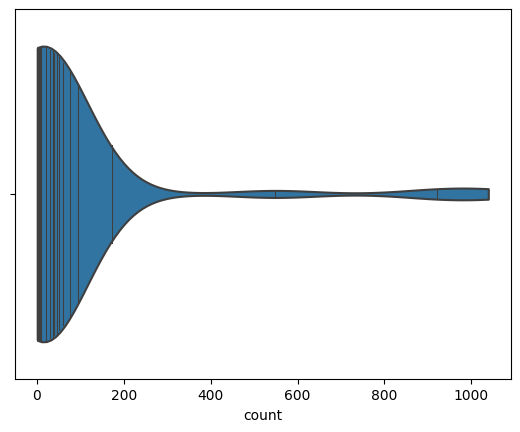

In [12]:
# sns.violinplot(x='Protein accession number', y=protein_mods_spp['Modifications identified by spectrum'].value_counts(), hue='Modifications identified by spectrum', data=protein_mods_spp)
# sns.violinplot(x = protein_mods_data['Modifications identified by spectrum'].value_counts(), y = protein_mods_data['Modifications identified by spectrum'])
sns.violinplot(x = protein_mods_spp['Modifications identified by spectrum'].value_counts(sort = False), inner="stick", cut = 0)
# sns.violinplot(x='Protein accession number', y=protein_mods_spp['Modifications identified by spectrum'].value_counts(), hue='Modifications identified by spectrum', data=protein_mods_spp)

<Axes: xlabel='proportion'>

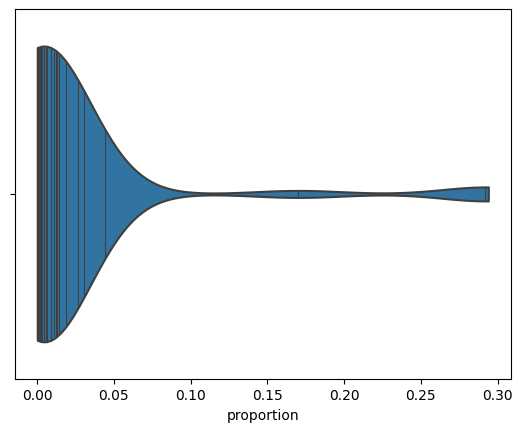

In [13]:
sns.violinplot(x = protein_mods_nat['Modifications identified by spectrum'].value_counts(normalize=True, sort=False), inner="stick", cut = 0)

<Axes: xlabel='count', ylabel='Biological sample category'>

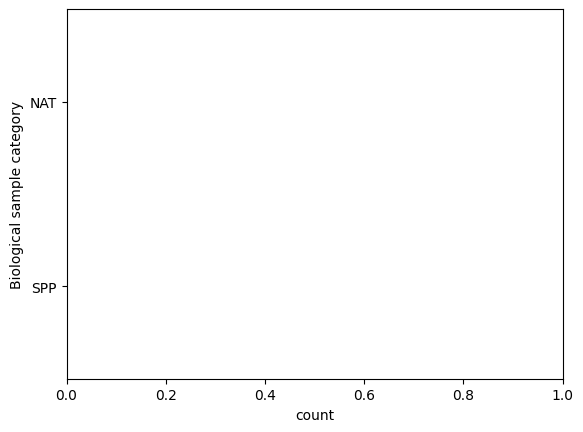

In [14]:
sns.violinplot(data = protein_mods_data, y = protein_mods_data['Biological sample category'], x = protein_mods_data['Modifications identified by spectrum'].value_counts(), cut = 0, bw = .15, split=True) 